In [1]:
import sys
sys.path.insert(0, '../')

In [2]:
""" This module implements the base function to implement a VQE for a Ising Chain with Transverse Field. """
import pennylane as qml
from pennylane import numpy as np
import numpy as onp
import jax
import jax.numpy as jnp
from jax import jit
from functools import partial

from matplotlib import pyplot as plt

import copy
import tqdm  # Pretty progress bars

import warnings

warnings.filterwarnings(
    "ignore",
    message="For Hamiltonians, the eigenvalues will be computed numerically. This may be computationally intensive for a large number of wires.Consider using a sparse representation of the Hamiltonian with qml.SparseHamiltonian.",
)


import vqe as vqe
import annni_model as annni
import hamiltonians as ham

In [3]:
N=8
n_states = 100

In [4]:
H_annni = ham.hamiltonian(annni.build_Hs, N = 8, n_states = 10)

In [27]:
myvqe = vqe.vqe(H_annni, vqe.vqe_circuit_annni)

In [28]:
lr = 60
n_epochs = 50000
reg = 100


In [29]:
myvqe.train(lr, n_epochs, reg, circuit = True, recycle = False, lr_decay = .9)

+--- CIRCUIT ---+
0: ──RY(0.00)──||─╭IsingXX(8.00)───────────────────────────────────────────────────────────────
1: ──RY(1.00)──||─╰IsingXX(8.00)─╭IsingXX(9.00)────────────────────────────────────────────────
2: ──RY(2.00)──||────────────────╰IsingXX(9.00)─╭IsingXX(10.00)────────────────────────────────
3: ──RY(3.00)──||───────────────────────────────╰IsingXX(10.00)─╭IsingXX(11.00)────────────────
4: ──RY(4.00)──||───────────────────────────────────────────────╰IsingXX(11.00)─╭IsingXX(12.00)
5: ──RY(5.00)──||───────────────────────────────────────────────────────────────╰IsingXX(12.00)
6: ──RY(6.00)──||──────────────────────────────────────────────────────────────────────────────
7: ──RY(7.00)──||──────────────────────────────────────────────────────────────────────────────

───────────────────────────────────||──RY(15.00)──||─╭IsingXX(23.00)────────────────────────────────
───────────────────────────────────||──RY(16.00)──||─│───────────────╭IsingXX(24.00)────────────────
───────────

Cost: 0.01409230101853609: 100%|█████████| 50000/50000 [02:35<00:00, 320.80it/s]


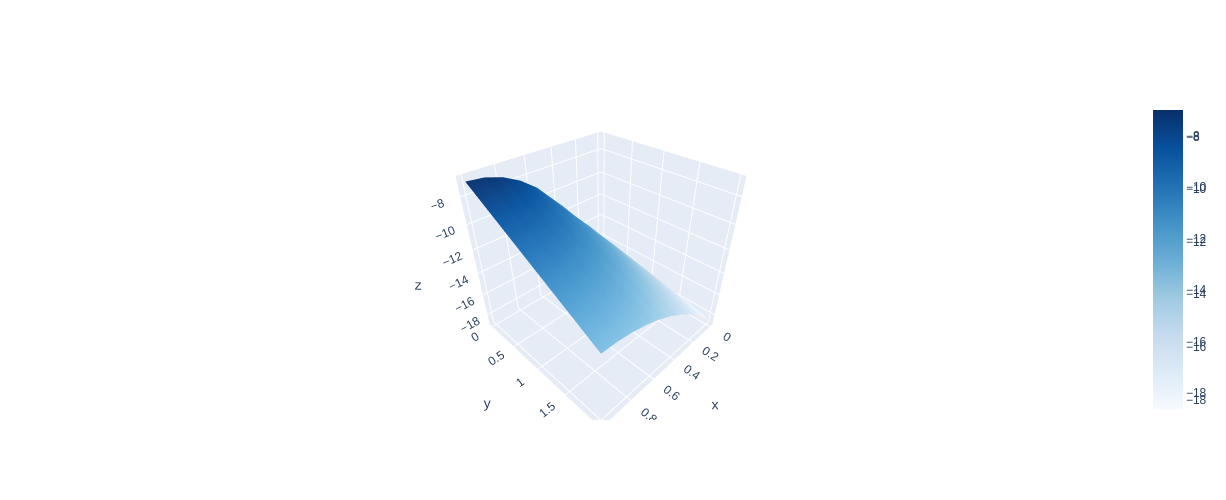

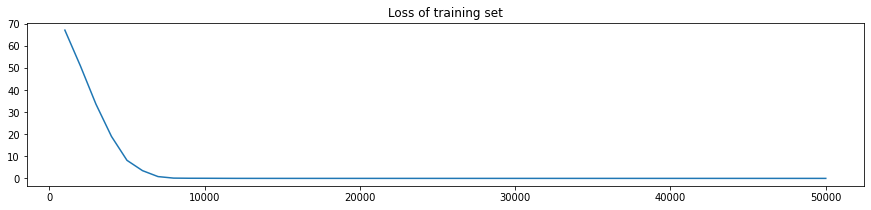

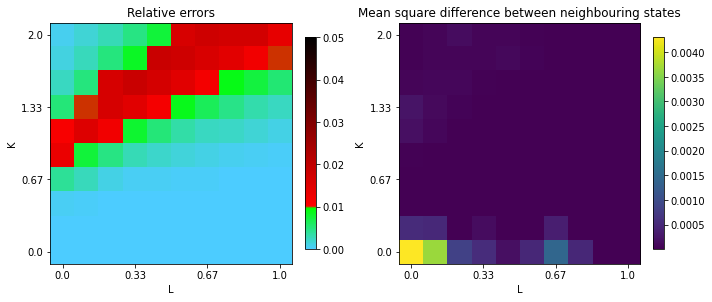

In [30]:
myvqe.show_results_annni()

+--- CIRCUIT ---+
0: ──RY(0.00)──||─╭IsingXX(8.00)───────────────────────────────────────────────────────────────
1: ──RY(1.00)──||─╰IsingXX(8.00)─╭IsingXX(9.00)────────────────────────────────────────────────
2: ──RY(2.00)──||────────────────╰IsingXX(9.00)─╭IsingXX(10.00)────────────────────────────────
3: ──RY(3.00)──||───────────────────────────────╰IsingXX(10.00)─╭IsingXX(11.00)────────────────
4: ──RY(4.00)──||───────────────────────────────────────────────╰IsingXX(11.00)─╭IsingXX(12.00)
5: ──RY(5.00)──||───────────────────────────────────────────────────────────────╰IsingXX(12.00)
6: ──RY(6.00)──||──────────────────────────────────────────────────────────────────────────────
7: ──RY(7.00)──||──────────────────────────────────────────────────────────────────────────────

───────────────────────────────────||──RY(15.00)──||─╭IsingXX(23.00)────────────────────────────────
───────────────────────────────────||──RY(16.00)──||─╰IsingXX(23.00)─╭IsingXX(24.00)────────────────
───────────

Cost: 0.02917996607720852: 100%|███████| 100000/100000 [03:32<00:00, 469.82it/s]


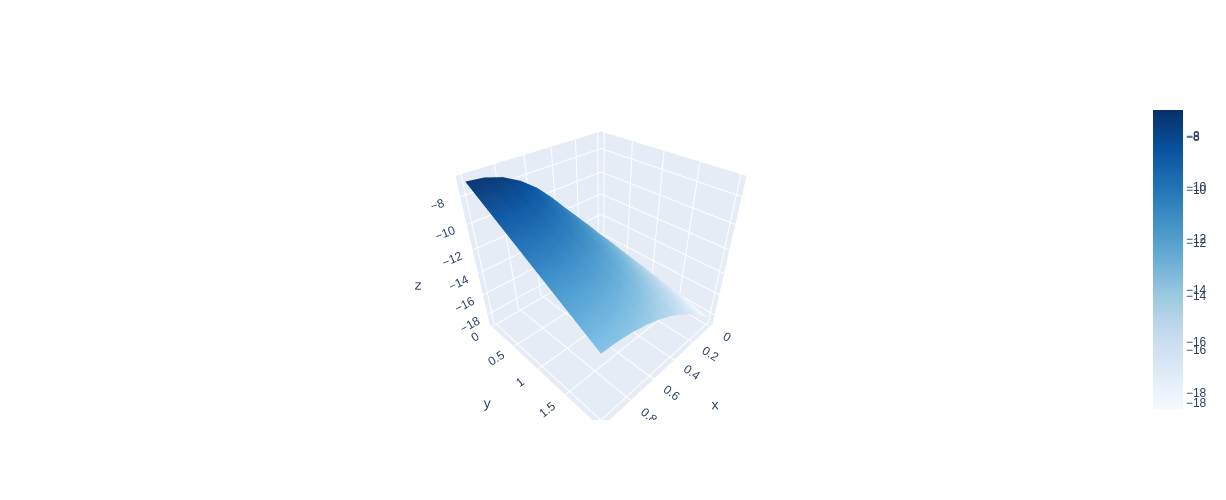

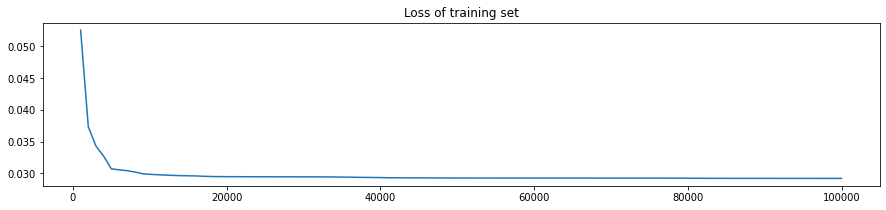

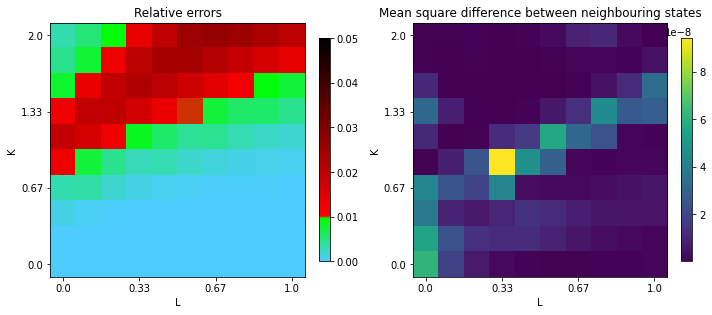

In [79]:
myvqe2 = vqe.vqe(H_annni, vqe.vqe_circuit_ising)
myvqe2.train(lr, n_epochs, reg, circuit = True, recycle = False, lr_decay = 0.99)
myvqe2.show_results_annni()